# Profiling and Preparing MTA Bridge and Tunnel Toll Data 

A measure of vehicle activity would be useful for analyzing how collisions vary with increased / decreased driving. The Metropolitan Transit Authority publishes vehicle counts passing through several tolling locations in the New York City area that could serve as a measure of overall driving activity.


### Key Questions
- What fields are there and are they useful? 
- Are there significant gaps in the data over time?
- Does bridge and tunnel toll activity reasonably represent driving activity in New York City?


### Data Sources
- Data obtained from https://data.ny.gov/Transportation/Hourly-Traffic-on-Metropolitan-Transportation-Auth/qzve-kjga/about_data

In [1]:
import os.path
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandahelper as ph
import pandas as pd
import src.utils
import src.visualizations as viz
from src.constants import DAY_OF_WEEK_MAP, MONTHS_MAP
from src.strings import add_line_breaks

## Parameters

In [2]:
DATA_LOC = "data/raw/mta/Hourly_Traffic_MTA.csv"
PLAZA_MAPPING_LOC = "data/Plaza ID Mapping.csv"
IMG_DIR = "output"
PROCESSED_DATA_LOC = "data/processed/traffic_index.pkl"
ANALYSIS_START_DATE = pd.Timestamp(year=2010, month=1, day=1)
ANALYSIS_END_DATE = pd.Timestamp(year=2024, month=1, day=1)
MILLION = 1000000
THOUSAND = 1000

## Overview of DataFrame

In [3]:
data = pd.read_csv(DATA_LOC)
data.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,05/30/2024,0,I,2021,413
1,21,05/30/2024,1,I,1187,281
2,21,05/30/2024,2,I,880,218
3,21,05/30/2024,3,I,852,203
4,21,05/30/2024,4,I,1698,321


In [4]:
ph.DataFrameProfile(data)

DataFrame-Level Info
----------------------  ------------
DF Shape                (2216975, 6)
Duplicated Rows         0
Memory Usage (MB)       312.594

Series Name           Data Type      Memory Usage (MB)
--------------------  -----------  -------------------
Index                 int64                   0.000132
Plaza ID              int64                  17.7358
Date                  object                130.802
Hour                  int64                  17.7358
Direction             object                110.849
# Vehicles - E-ZPass  int64                  17.7358
# Vehicles - VToll    int64                  17.7358

Summary of Nulls Per Row
--------------------------  --
Number of Columns            6
min                          0
1%                           0
5%                           0
25%                          0
50%                          0
75%                          0
95%                          0
99%                          0
max                          0
mean                         0
standard deviation           0
median                       0
median absolute deviation    0
skew                         0

## Examining individual fields (columns)

In [5]:
plaza_id_report = ph.SeriesProfile(data["Plaza ID"])
plaza_id_report

Plaza ID Info
---------------  -------
Data Type        int64
Count            2216975
Unique Values    20
Null Values      0

  Value    Count  % of total
-------  -------  ------------
      3   135216  6.10%
      9   135216  6.10%
      2   130560  5.89%
      1   130560  5.89%
      6   128352  5.79%
      5   128352  5.79%
      7   123072  5.55%
      8   122784  5.54%
      4   120624  5.44%
     27   113694  5.13%
     23   112561  5.08%
     30    86877  3.92%
     11    65832  2.97%
     21    59441  2.68%
     22    56804  2.56%

Statistic                         Value
-------------------------  ------------
count                       2.21698e+06
min                         1
1%                          1
5%                          1
25%                         5
50%                         9
75%                        25
95%                        29
99%                        30
max                        30
mean                       14.5274
standard deviation         10.5746
median                      9
median absolute deviation   8
skew                        0.167066

In [6]:
date_report = ph.SeriesProfile(data["Date"])
date_report

Date Info
-------------  -------
Data Type      object
Count          2216975
Unique Values  5166
Null Values    0

Value         Count  % of total
----------  -------  ------------
01/01/2010      456  0.02%
01/09/2010      456  0.02%
01/02/2010      456  0.02%
01/03/2010      456  0.02%
01/04/2010      456  0.02%
01/05/2010      456  0.02%
01/06/2010      456  0.02%
01/07/2010      456  0.02%
01/08/2010      456  0.02%
01/10/2010      456  0.02%
08/29/2017       96  0.00%
08/30/2017       96  0.00%
08/31/2017       96  0.00%
09/01/2017       96  0.00%
09/30/2016       48  0.00%

In [7]:
hour_report = ph.SeriesProfile(data["Hour"])
hour_report

Hour Info
-------------  -------
Data Type      int64
Count          2216975
Unique Values  24
Null Values    0

  Value    Count  % of total
-------  -------  ------------
      6    92399  4.17%
     14    92399  4.17%
     15    92399  4.17%
      7    92398  4.17%
      8    92398  4.17%
     12    92397  4.17%
     13    92397  4.17%
     16    92397  4.17%
      4    92396  4.17%
     11    92396  4.17%
     23    92374  4.17%
      0    92338  4.17%
      3    92320  4.16%
      1    92297  4.16%
      2    92174  4.16%

Statistic                         Value
-------------------------  ------------
count                       2.21698e+06
min                         0
1%                          0
5%                          1
25%                         6
50%                        12
75%                        18
95%                        22
99%                        23
max                        23
mean                       11.5017
standard deviation          6.92132
median                     12
median absolute deviation   6
skew                       -0.000231042

In [8]:
hour_report = ph.SeriesProfile(data["Direction"])
hour_report

Direction Info
----------------  -------
Data Type         object
Count             2216975
Unique Values     2
Null Values       0

Value      Count  % of total
-------  -------  ------------
I        1126660  50.82%
O        1090315  49.18%

In [9]:
ez_report = ph.SeriesProfile(data["# Vehicles - E-ZPass"])
ez_report

# Vehicles - E-ZPass Info
---------------------------  -------
Data Type                    int64
Count                        2216975
Unique Values                9594
Null Values                  0

  Value    Count  % of total
-------  -------  ------------
      0     3569  0.16%
     44     2603  0.12%
     43     2588  0.12%
     42     2559  0.12%
     40     2535  0.11%
     36     2531  0.11%
     39     2518  0.11%
     37     2515  0.11%
     41     2512  0.11%
     45     2485  0.11%
   9184        1  0.00%
   9084        1  0.00%
   9277        1  0.00%
   9492        1  0.00%
   9177        1  0.00%

Statistic                            Value
-------------------------  ---------------
count                          2.21698e+06
min                            0
1%                            27
5%                            66
25%                          415
50%                         1075
75%                         2158
95%                         3964
99%                         6902
max                        17782
mean                        1461.24
standard deviation          1393.79
median                      1075
median absolute deviation    779
skew                           1.77082

In [10]:
vtoll_report = ph.SeriesProfile(data["# Vehicles - VToll"])
vtoll_report

# Vehicles - VToll Info
-------------------------  -------
Data Type                  int64
Count                      2216975
Unique Values              1831
Null Values                0

  Value    Count  % of total
-------  -------  ------------
     10    10038  0.45%
     11     9995  0.45%
      9     9964  0.45%
     12     9839  0.44%
      8     9810  0.44%
     13     9614  0.43%
      7     9534  0.43%
     14     9438  0.43%
     15     9250  0.42%
     16     8808  0.40%
   1714        1  0.00%
   1837        1  0.00%
   1825        1  0.00%
   1745        1  0.00%
   1742        1  0.00%

Statistic                           Value
-------------------------  --------------
count                         2.21698e+06
min                           0
1%                            5
5%                           14
25%                          74
50%                         197
75%                         412
95%                         761
99%                        1138
max                        4615
mean                        274.432
standard deviation          254.295
median                      197
median absolute deviation   145
skew                          1.40106

## Creating additional fields for analysis

I manually created a mapping between Plaza ID and the name of the bridge or tunnel (including lat-long) using the MTA data dictionary.

### Location

In [11]:
plaza_location_info = pd.read_csv(PLAZA_MAPPING_LOC)
plaza_location_info

,Plaza ID,Bridge / Tunnel,Latitude,Longitude
0,21,Robert F. Kennedy Bridge,40.779648,-73.926771
1,22,Robert F. Kennedy Bridge,40.779648,-73.926771
2,23,Bronx-Whitestone Bridge (BWB),40.801405,-73.829348
3,24,Henry Hudson Bridge (HHB),40.877645,-73.922386
4,25,Marine Parkway-Gil Hodges Memorial Bridge (MPB),40.573195,-73.884734
5,26,Cross Bay Veterans Memorial Bridge (CBB),40.597142,-73.820928
6,27,Queens Midtown Tunnel (QMT),40.745490,-73.964421
7,28,Hugh L. Carey Tunnel (HCT),40.694049,-74.012872
8,29,Throgs Neck Bridge (TNB),40.799901,-73.793407
9,30,Verrazzano-Narrows Bridge (VNB),40.606461,-74.045057


In [12]:
plaza_bridge_map = dict(
    zip(plaza_location_info["Plaza ID"], plaza_location_info["Bridge / Tunnel"])
)
data["Location"] = data["Plaza ID"].map(plaza_bridge_map)

### Datetime

In [13]:
data["date hour"] = data["Date"] + " " + data["Hour"].astype(dtype="str")
data["datetime"] = pd.to_datetime(data["date hour"], format="%m/%d/%Y %H")
data = data.drop(["date hour"], axis=1)
data = data.set_index("datetime")

In [14]:
type(data.index[0])

pandas._libs.tslibs.timestamps.Timestamp

### Sum of Vehicles

In [15]:
data["Sum Vehicles"] = data["# Vehicles - E-ZPass"] + data["# Vehicles - VToll"]

## Assessing Completeness of Data

#### Observations per day

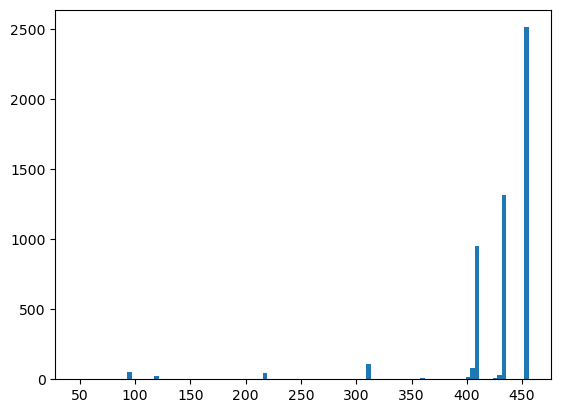

In [16]:
date_histogram = plt.hist(data["Date"].value_counts(), bins=100)

In [17]:
data["Date"].value_counts().unique()

array([456, 432, 431, 430, 429, 428, 427, 426, 425, 422, 418, 414, 408,
       407, 406, 405, 404, 403, 402, 401, 400, 398, 396, 391, 384, 383,
       360, 312, 216, 120,  96,  48])

In [18]:
sum(data["Date"].value_counts() < 312)

123

#### Gaps in data

There are cumulatively ~98 days of missing observations with 53 days of the missing observations happening in 2017.

In [19]:
ph.frequency_table(ph.time_diffs_index((data)))

,Count,% of Total
0 days 00:00:00,2092998,94.41%
0 days 01:00:00,123945,5.59%
1 days 01:00:00,14,0.00%
0 days 02:00:00,7,0.00%
7 days 01:00:00,4,0.00%
2 days 01:00:00,3,0.00%
28 days 01:00:00,1,0.00%
14 days 01:00:00,1,0.00%
8 days 01:00:00,1,0.00%


In [20]:
gaps = ph.id_gaps_index(data, pd.Timedelta(hours=1))
gaps

,diffs
datetime,
2017-10-22 00:00:00,28 days 01:00:00
2017-11-12 00:00:00,14 days 01:00:00
2022-09-18 00:00:00,8 days 01:00:00
2018-10-07 00:00:00,7 days 01:00:00
2017-12-17 00:00:00,7 days 01:00:00
2018-08-12 00:00:00,7 days 01:00:00
2022-07-31 00:00:00,7 days 01:00:00
2017-08-20 00:00:00,2 days 01:00:00
2017-08-13 00:00:00,2 days 01:00:00


In [21]:
(gaps - pd.Timedelta(hours=1)).sum()

diffs   98 days 07:00:00
dtype: timedelta64[ns]

In [22]:
gaps.groupby(by=gaps.index.year).sum().sort_values(by="diffs", ascending=False)

,diffs
datetime,
2017,53 days 05:00:00
2022,17 days 06:00:00
2018,15 days 05:00:00
2023,4 days 06:00:00
2019,4 days 05:00:00
2021,3 days 05:00:00
2024,1 days 03:00:00
2012,1 days 01:00:00
2020,0 days 02:00:00


In [23]:
dates = pd.Series(data["Date"])
# resampling creates observations for periods of time that were missing from dataset (that have a count of 0)
obs_per_day = dates.resample("D").count()
days_missing_observations = obs_per_day[obs_per_day == 0]
len(days_missing_observations)

98

In [24]:
days_missing_observations.groupby(
    by=days_missing_observations.index.year
).count().sort_values(ascending=False)

datetime
2017    53
2022    17
2018    15
2019     4
2023     4
2021     3
2012     1
2024     1
Name: Date, dtype: int64

In [25]:
ph.category_gaps(data["Location"], pd.Timedelta(hours=1))

,Cumulative Gap
Henry Hudson Bridge (HHB),382 days 07:00:00
Hugh L. Carey Tunnel (HCT),337 days 10:00:00
Queens Midtown Tunnel (QMT),331 days 07:00:00
Marine Parkway-Gil Hodges Memorial Bridge (MPB),225 days 00:00:00
Cross Bay Veterans Memorial Bridge (CBB),222 days 11:00:00
Robert F. Kennedy Bridge,175 days 07:00:00
Verrazzano-Narrows Bridge (VNB),152 days 14:00:00
Bronx-Whitestone Bridge (BWB),101 days 23:00:00
Throgs Neck Bridge (TNB),100 days 10:00:00


In [26]:
for crossing in data["Location"].unique():
    print(crossing)
    print(
        ph.id_gaps_index(
            data["Location"][data["Location"] == crossing], pd.Timedelta(hours=25)
        ),
        "\n",
    )

Robert F. Kennedy Bridge
                      diffs
datetime                   
2017-09-03 80 days 01:00:00
2017-10-22 28 days 01:00:00
2017-11-12 14 days 01:00:00
2022-09-18  8 days 01:00:00
2017-12-17  7 days 01:00:00
2018-08-12  7 days 01:00:00
2018-10-07  7 days 01:00:00
2022-07-31  7 days 01:00:00
2019-06-16  2 days 01:00:00 

Bronx-Whitestone Bridge (BWB)
                      diffs
datetime                   
2017-10-22 28 days 01:00:00
2017-11-12 14 days 01:00:00
2022-09-18  8 days 01:00:00
2017-12-17  7 days 01:00:00
2018-08-12  7 days 01:00:00
2018-10-07  7 days 01:00:00
2022-07-31  7 days 01:00:00
2017-08-13  2 days 01:00:00
2017-08-20  2 days 01:00:00
2019-06-16  2 days 01:00:00 

Henry Hudson Bridge (HHB)
                       diffs
datetime                    
2017-09-03 287 days 01:00:00
2017-10-22  28 days 01:00:00
2017-11-12  14 days 01:00:00
2022-09-18   8 days 01:00:00
2017-12-17   7 days 01:00:00
2018-08-12   7 days 01:00:00
2018-10-07   7 days 01:00:00
2022-07-31

Of the 5000+ days in the data set:
- There \~120 days  where there are more than 0 but less than 312 observations per day. 
- There are \~98 days (~2% of days) of missing time across all crossings
- More than half of the missing days are in 2017 where there are gaps of up to 28 days
- Many of the crossings have non-overlapping missing time in 2017

__It appears that the data set has some gaps, notably in 2017.__

#### Observations per Toll Plaza per Day

In [27]:
hour_groupby = data.groupby(["Date", "Plaza ID", "Direction"])["Hour"].count()
ph.frequency_table(hour_groupby)

,Count,% of Total
24,92060,99.63%
23,195,0.21%
21,57,0.06%
22,56,0.06%
20,16,0.02%
19,9,0.01%
18,4,0.00%
17,2,0.00%
12,2,0.00%


In [28]:
obs_per_day.groupby(by=obs_per_day.index.year).mean()

datetime
2010    456.000000
2011    455.868493
2012    454.754098
2013    456.000000
2014    456.000000
2015    456.000000
2016    449.377049
2017    231.235616
2018    397.306849
2019    403.202740
2020    409.956284
2021    428.265753
2022    411.808219
2023    427.153425
2024    428.754967
Name: Date, dtype: float64

When there are observations for a toll plaza, there tends to be 24 per day per direction. Variations in the mean number of observations per day is likely explained by the gaps identified in dataset, particularly the gaps in 2017.

## Is the dataset useful for creating overall measure of traffic?

Does bridge and tunnel toll activity reasonably represent driving activity in New York City?

In [29]:
map_center = (40.69, -73.92)
locations = set(
    zip(
        plaza_location_info["Latitude"],
        plaza_location_info["Longitude"],
        plaza_location_info["Bridge / Tunnel"],
    )
)
map_nyc = folium.Map(
    location=map_center, zoom_start=10, tiles="OpenStreetMap", width=600, height=600
)
for loc in locations:
    folium.Marker((loc[0], loc[1]), popup=loc[2], tooltip=loc[2]).add_to(map_nyc)
map_nyc

The bridges are tunnels are distributed through the city and do not exclusively focus on access to a central business district. All five boroughs (counties) are connected through these bridges/tunnels. 

### Vehicle Counts by Location

In [30]:
crossings_by_location = (
    data.groupby(by=data["Location"])["Sum Vehicles"].sum().sort_values(ascending=False)
)
crossings_millions = [round(x / MILLION) for x in crossings_by_location.values]

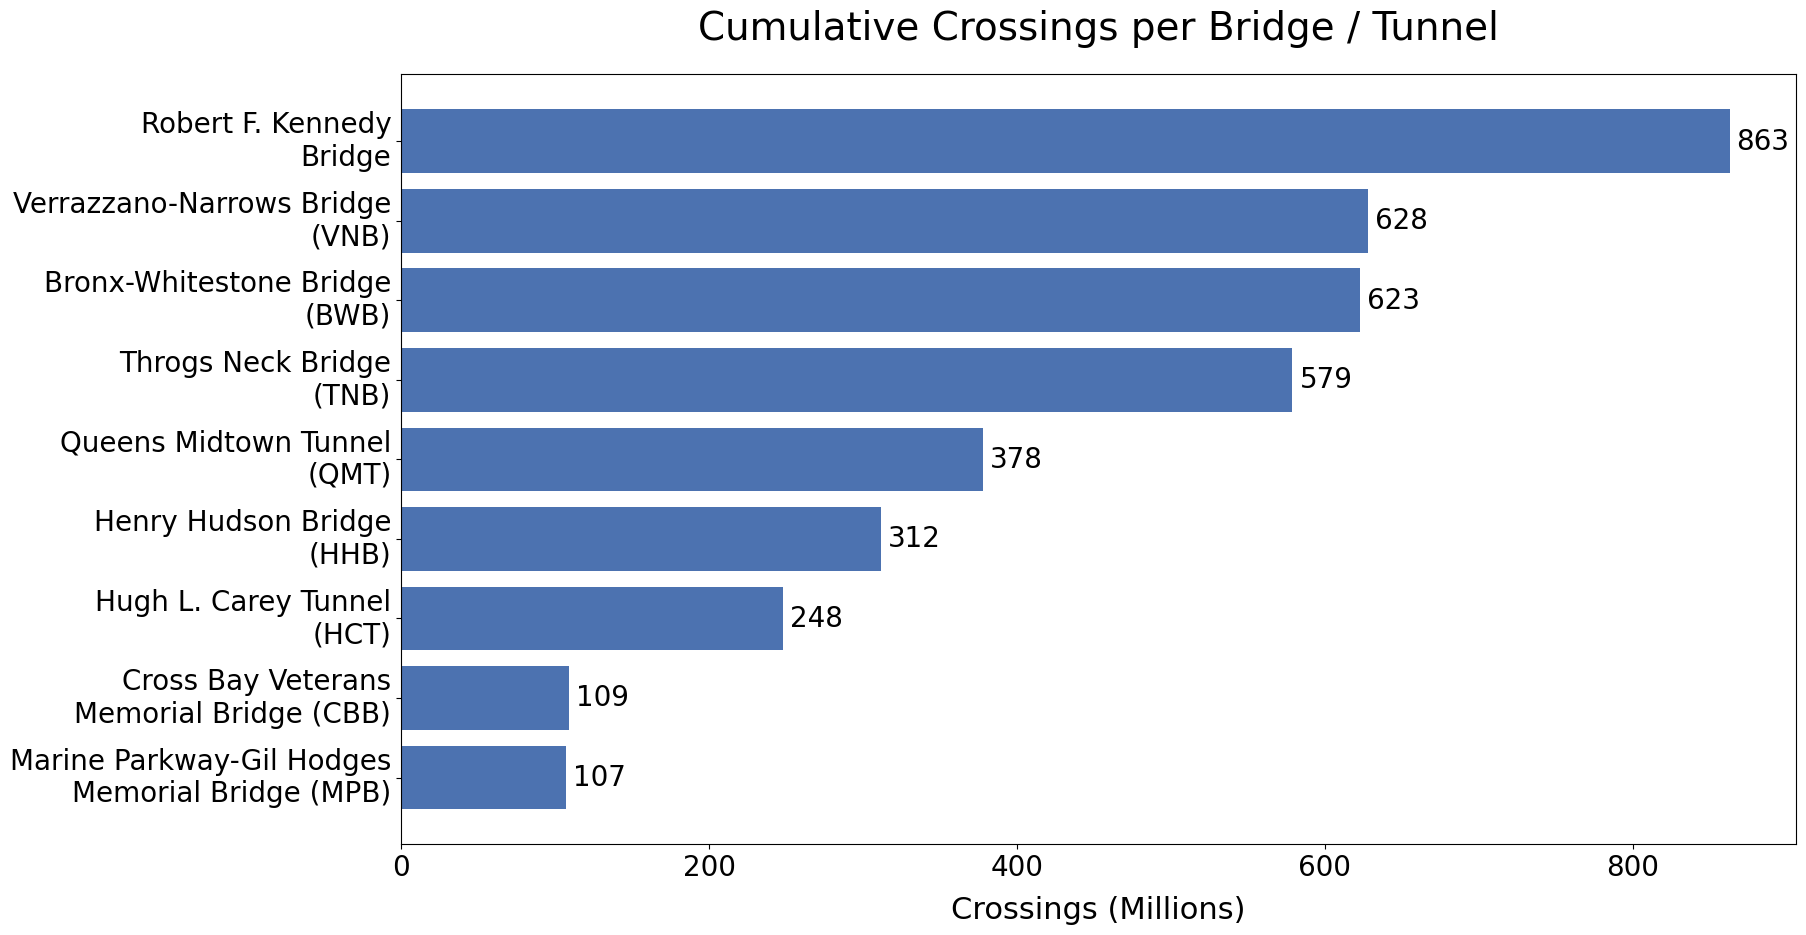

In [31]:
title = "Cumulative Crossings per Bridge / Tunnel"
x_label = "Crossings (Millions)"
bar_lables = add_line_breaks(crossings_by_location.index)
viz.horizontal_bar_chart(
    bar_lables,
    crossings_millions,
    title=title,
    xlabel=x_label,
    reverse=True,
    save=os.path.join(IMG_DIR, "mta", "cumulative_crossings.png"),
)

It seems reasonable that the RFK (Triborough) bridge and Verrazzano bridge would have significantly more traffic than the Cross Bay and Marine Parkway bridges

### Relationship of Crossings Across Time

How does traffic vary at the various bridges and tunels over time?

In [32]:
table = pd.pivot_table(
    data,
    values="Sum Vehicles",
    index=data.index,
    columns="Location",
    aggfunc="sum",
    fill_value=0,
)

In [33]:
corr_matrix = table.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix[mask] = np.nan
corr_matrix.style.background_gradient(cmap="Blues", axis=None, low=0.6).highlight_null(
    color="#f1f1f1"
).format(precision=2)

Location,Bronx-Whitestone Bridge (BWB),Cross Bay Veterans Memorial Bridge (CBB),Henry Hudson Bridge (HHB),Hugh L. Carey Tunnel (HCT),Marine Parkway-Gil Hodges Memorial Bridge (MPB),Queens Midtown Tunnel (QMT),Robert F. Kennedy Bridge,Throgs Neck Bridge (TNB),Verrazzano-Narrows Bridge (VNB)
Location,,,,,,,,,
Bronx-Whitestone Bridge (BWB),nan,nan,nan,nan,nan,nan,nan,nan,nan
Cross Bay Veterans Memorial Bridge (CBB),0.85,nan,nan,nan,nan,nan,nan,nan,nan
Henry Hudson Bridge (HHB),0.84,0.87,nan,nan,nan,nan,nan,nan,nan
Hugh L. Carey Tunnel (HCT),0.83,0.86,0.93,nan,nan,nan,nan,nan,nan
Marine Parkway-Gil Hodges Memorial Bridge (MPB),0.84,0.97,0.88,0.85,nan,nan,nan,nan,nan
Queens Midtown Tunnel (QMT),0.79,0.84,0.91,0.94,0.83,nan,nan,nan,nan
Robert F. Kennedy Bridge,0.91,0.91,0.89,0.89,0.89,0.89,nan,nan,nan
Throgs Neck Bridge (TNB),0.93,0.86,0.84,0.80,0.86,0.79,0.91,nan,nan
Verrazzano-Narrows Bridge (VNB),0.76,0.65,0.71,0.76,0.65,0.66,0.71,0.64,nan


There is a reasonably strong, but not perfect correlation of traffic levels over time suggesting that the data is capturing some variation in traffic patterns. E.g., the data does not simply represent rush-hour traffic to a central business district. Let's take a look at the weekly traffic patterns on three of the bridges to see how they vary.

In [34]:
select_crossings = [
    "Verrazzano-Narrows Bridge (VNB)",
    "Throgs Neck Bridge (TNB)",
    "Robert F. Kennedy Bridge",
]
mn_mx_select_crossings = src.utils.min_max_across_crosstabs(
    categories=select_crossings,
    cat_series=data["Location"],
    idx_series=data.index.dayofweek,
    col_series=data.index.hour,
    value_series=data["Sum Vehicles"].values,  # series with timeindex throws error
    aggfunc="sum",
)

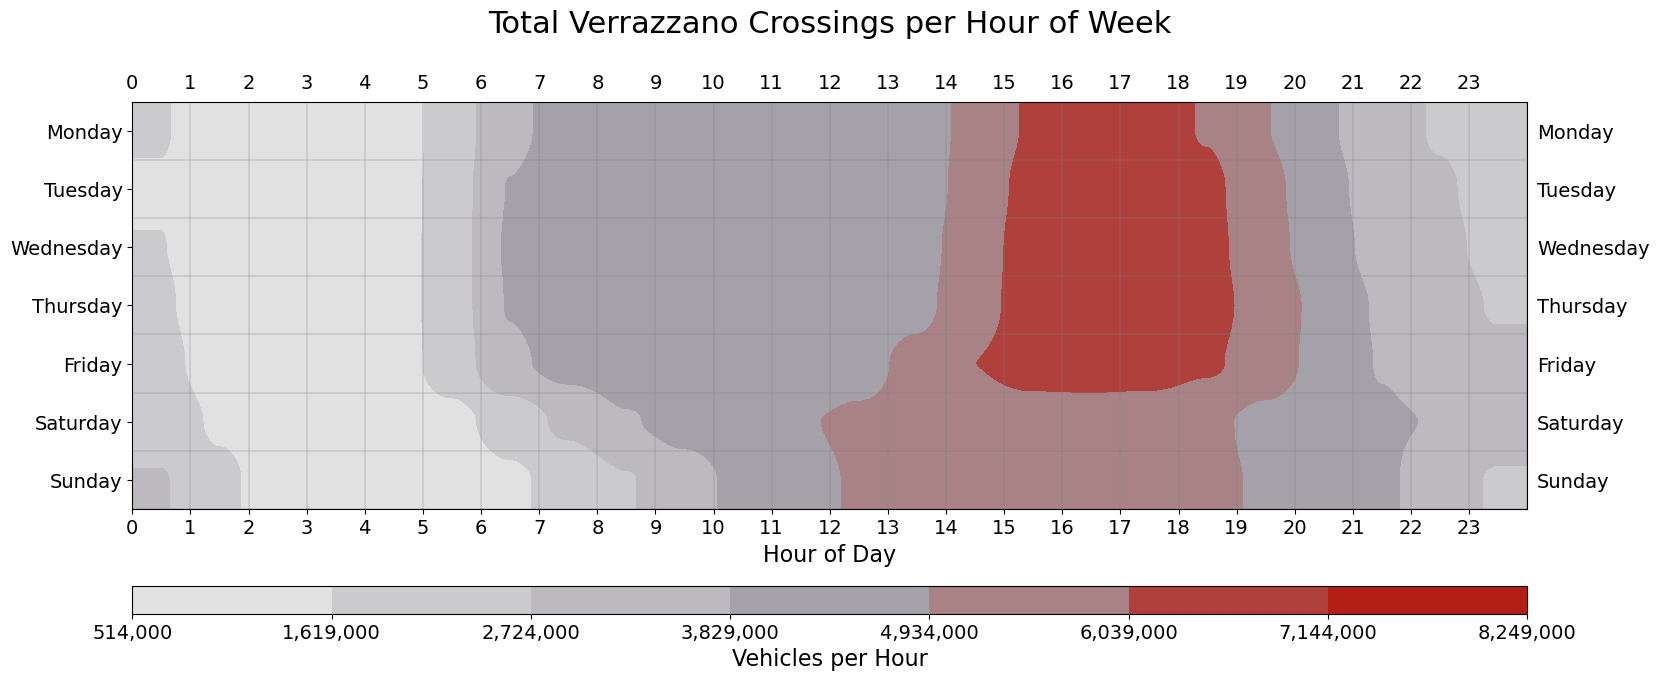

In [35]:
verrazzano = data[data["Location"] == "Verrazzano-Narrows Bridge (VNB)"]
verrazzano_ct = pd.crosstab(
    index=verrazzano.index.dayofweek,
    columns=verrazzano.index.hour,
    values=verrazzano["Sum Vehicles"].values,
    aggfunc="sum",
)
verrazzano_ct.rename(index=DAY_OF_WEEK_MAP, inplace=True)
ct_labels = src.utils.make_heatmap_labels(
    "Total Verrazzano Crossings per Hour of Week", cbar_label="Vehicles per Hour"
)
viz.heat_map(
    verrazzano_ct,
    ct_labels,
    interpolation="hanning",
    min_max=mn_mx_select_crossings,
    cbar_format=lambda x: f"{round(x, -3):,.0f}",
    save=os.path.join(IMG_DIR, "mta", "verrazzano_crossings_heatmap.png"),
)

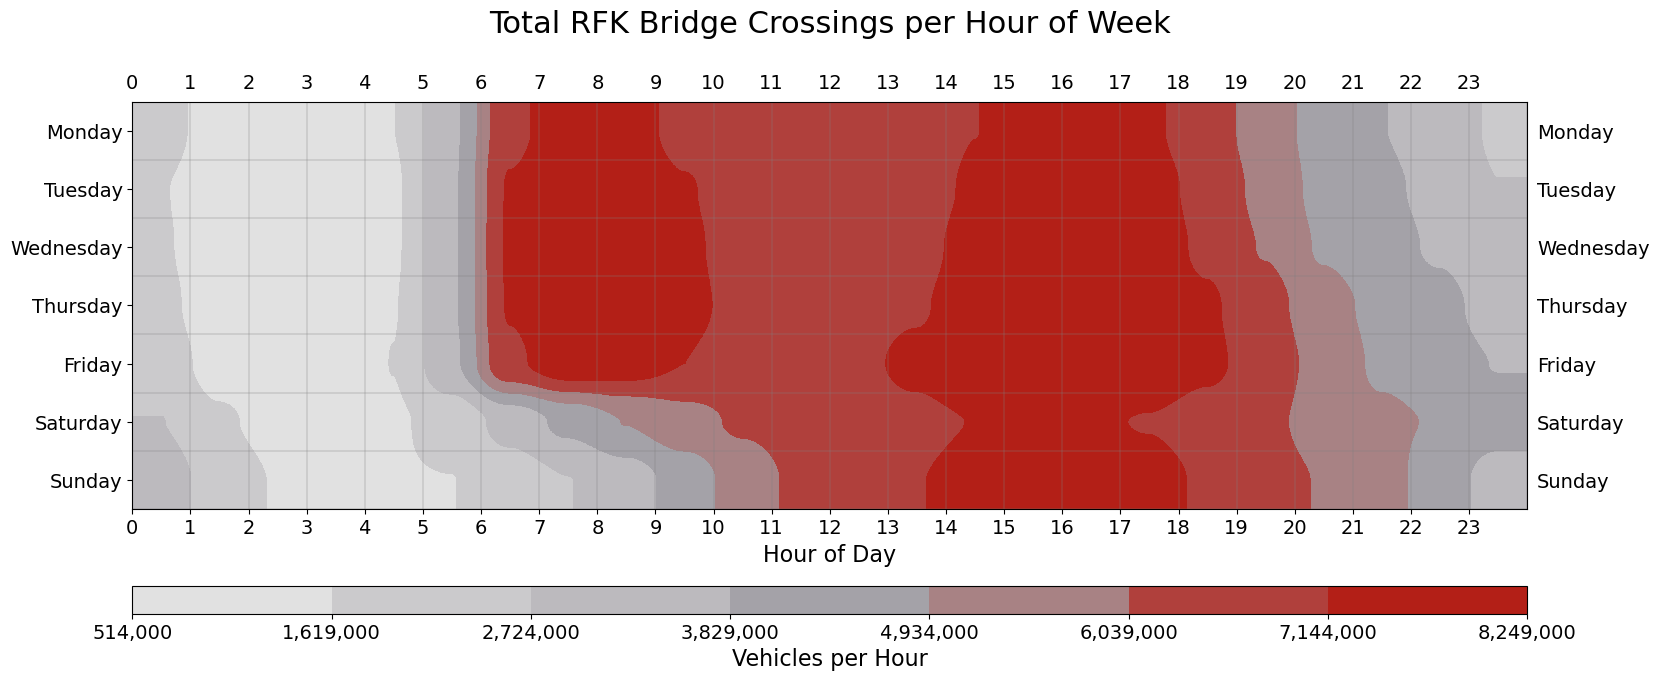

In [36]:
rfk = data[data["Location"] == "Robert F. Kennedy Bridge"]
rfk_ct = pd.crosstab(
    index=rfk.index.dayofweek,
    columns=rfk.index.hour,
    values=rfk["Sum Vehicles"].values,
    aggfunc="sum",
)
rfk_ct.rename(index=DAY_OF_WEEK_MAP, inplace=True)
ct_labels = src.utils.make_heatmap_labels(
    "Total RFK Bridge Crossings per Hour of Week", cbar_label="Vehicles per Hour"
)
viz.heat_map(
    rfk_ct,
    ct_labels,
    interpolation="hanning",
    min_max=mn_mx_select_crossings,
    cbar_format=lambda x: f"{round(x, -3):,.0f}",
    save=os.path.join(IMG_DIR, "mta", "rfk_crossings_heatmap.png"),
)

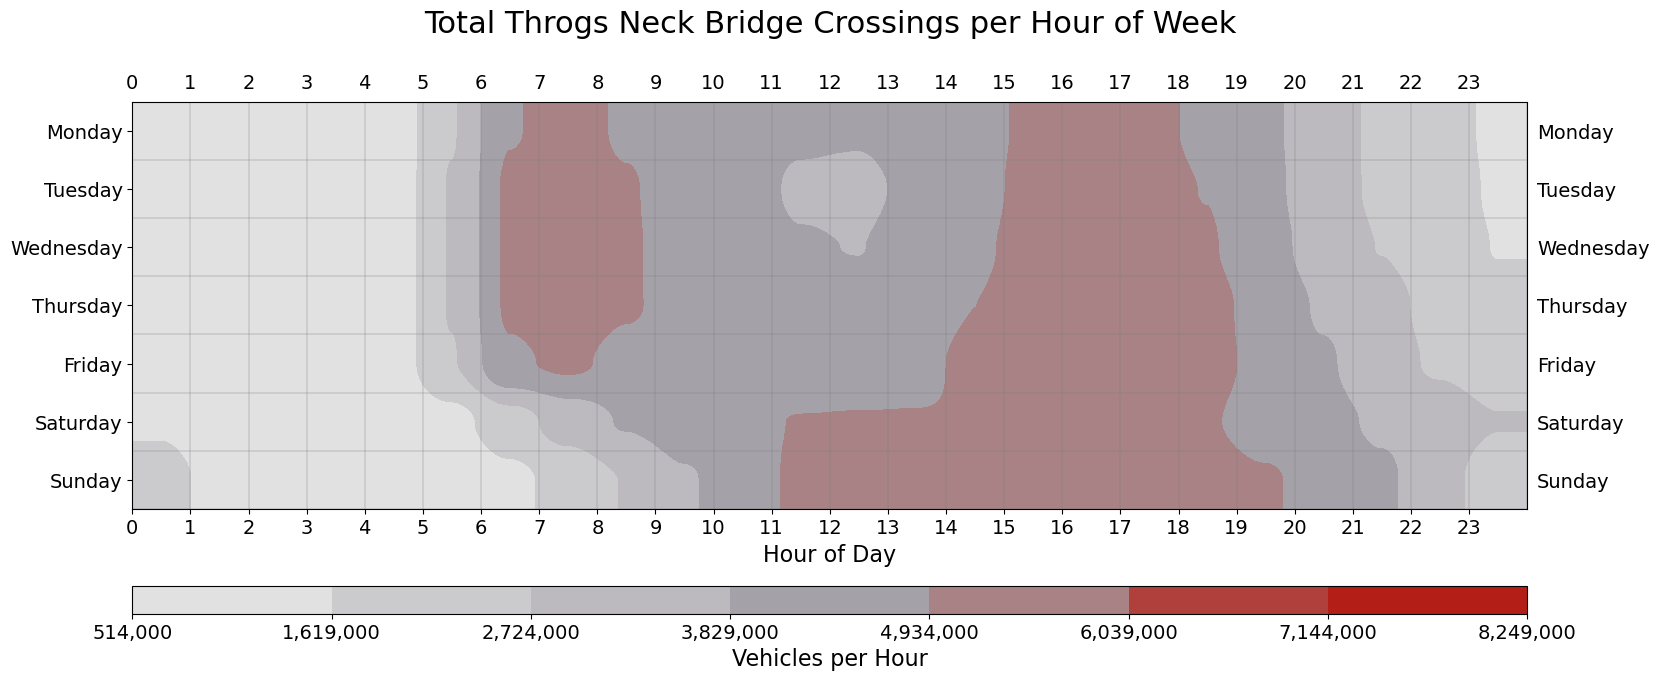

In [37]:
tnb = data[data["Location"] == "Throgs Neck Bridge (TNB)"]
tnb_ct = pd.crosstab(
    index=tnb.index.dayofweek,
    columns=tnb.index.hour,
    values=tnb["Sum Vehicles"].values,
    aggfunc="sum",
)
tnb_ct.rename(index=DAY_OF_WEEK_MAP, inplace=True)
ct_labels = src.utils.make_heatmap_labels(
    "Total Throgs Neck Bridge Crossings per Hour of Week",
    cbar_label="Vehicles per Hour",
)
viz.heat_map(
    tnb_ct,
    ct_labels,
    interpolation="hanning",
    min_max=mn_mx_select_crossings,
    cbar_format=lambda x: f"{round(x, -3):,.0f}",
    save=os.path.join(IMG_DIR, "mta", "tnb_crossings_heatmap.png"),
)

We see that traffic on the Verrazzano Bridge is heaviest in the afternoons, particularly on weekdays. The RFK bridge is consistently busy. And the Throgs Neck bridge is busiest on weekends. The differences in traffic patterns suggests that a sum of the total bridge and tunnel crossings would be a good index for overall NYC traffic levels.

### Annual Vehicle Crossings

Selecting date range

In [38]:
data = data.reset_index()
bt_data_clean = data[
    data["datetime"].between(ANALYSIS_START_DATE, ANALYSIS_END_DATE, inclusive="left")
]

In [39]:
bt_data_clean["datetime"].min(), bt_data_clean["datetime"].max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2023-12-31 23:00:00'))

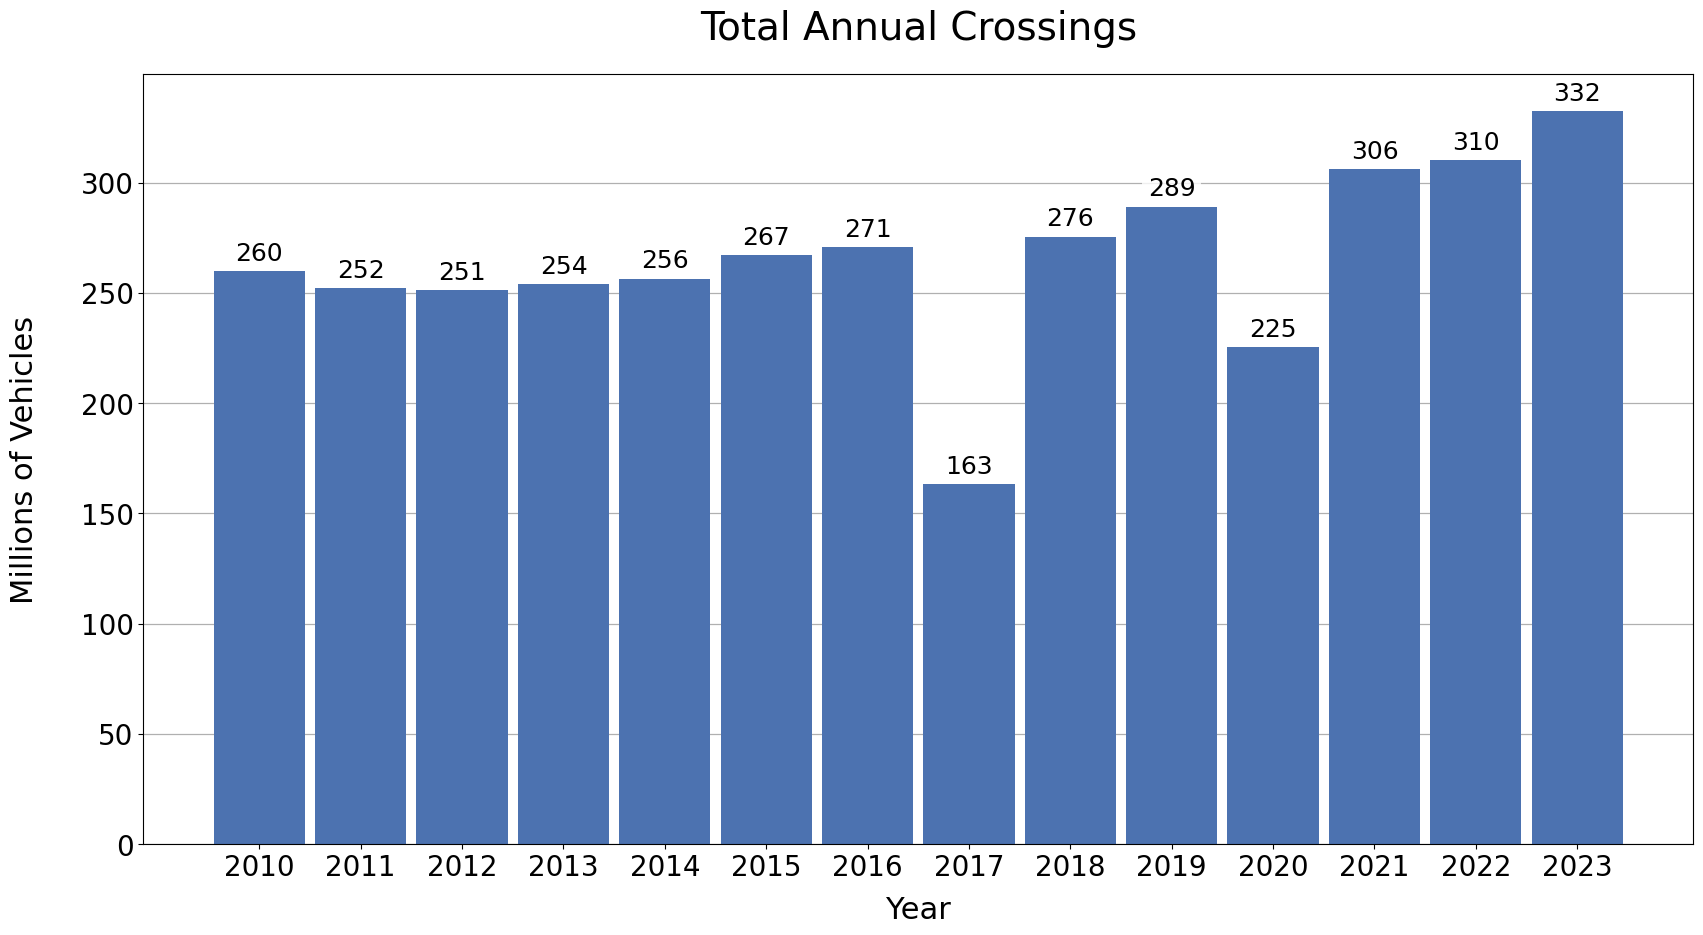

In [40]:
annual_crossings = pd.DataFrame(
    bt_data_clean.groupby(by=bt_data_clean["datetime"].dt.year)["Sum Vehicles"].sum()
    / MILLION
)
viz.grouped_bar_chart(
    annual_crossings,
    title="Total Annual Crossings",
    ylabel="Millions of Vehicles",
    xlabel="Year",
    ylabel_rotation="vertical",
    figsize=(20, 10),
    bar_fontsize=18,
    bar_padding=4,
    bar_label_bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    save=os.path.join(IMG_DIR, "mta", "total_annual_crossings.png"),
)

__2017 numbers are clearly questionable and will be excluded from the following analyses of monthly and weekly patterns__

In [41]:
exclude_2017 = bt_data_clean[bt_data_clean["datetime"].dt.year != 2017]

Calculating time-related values for scaling values

In [42]:
time_range = (
    bt_data_clean["datetime"].max() - bt_data_clean["datetime"].min()
)  # Pandas Timedelta object
total_days = (
    time_range.round("1d").days - 365
)  # removing one year to reflect exclusion of 2017
total_years = round(total_days / 365.25)
total_weeks = total_days / 7

### Monthly Variation
- Crossings are higher in summer months and lower in January / February

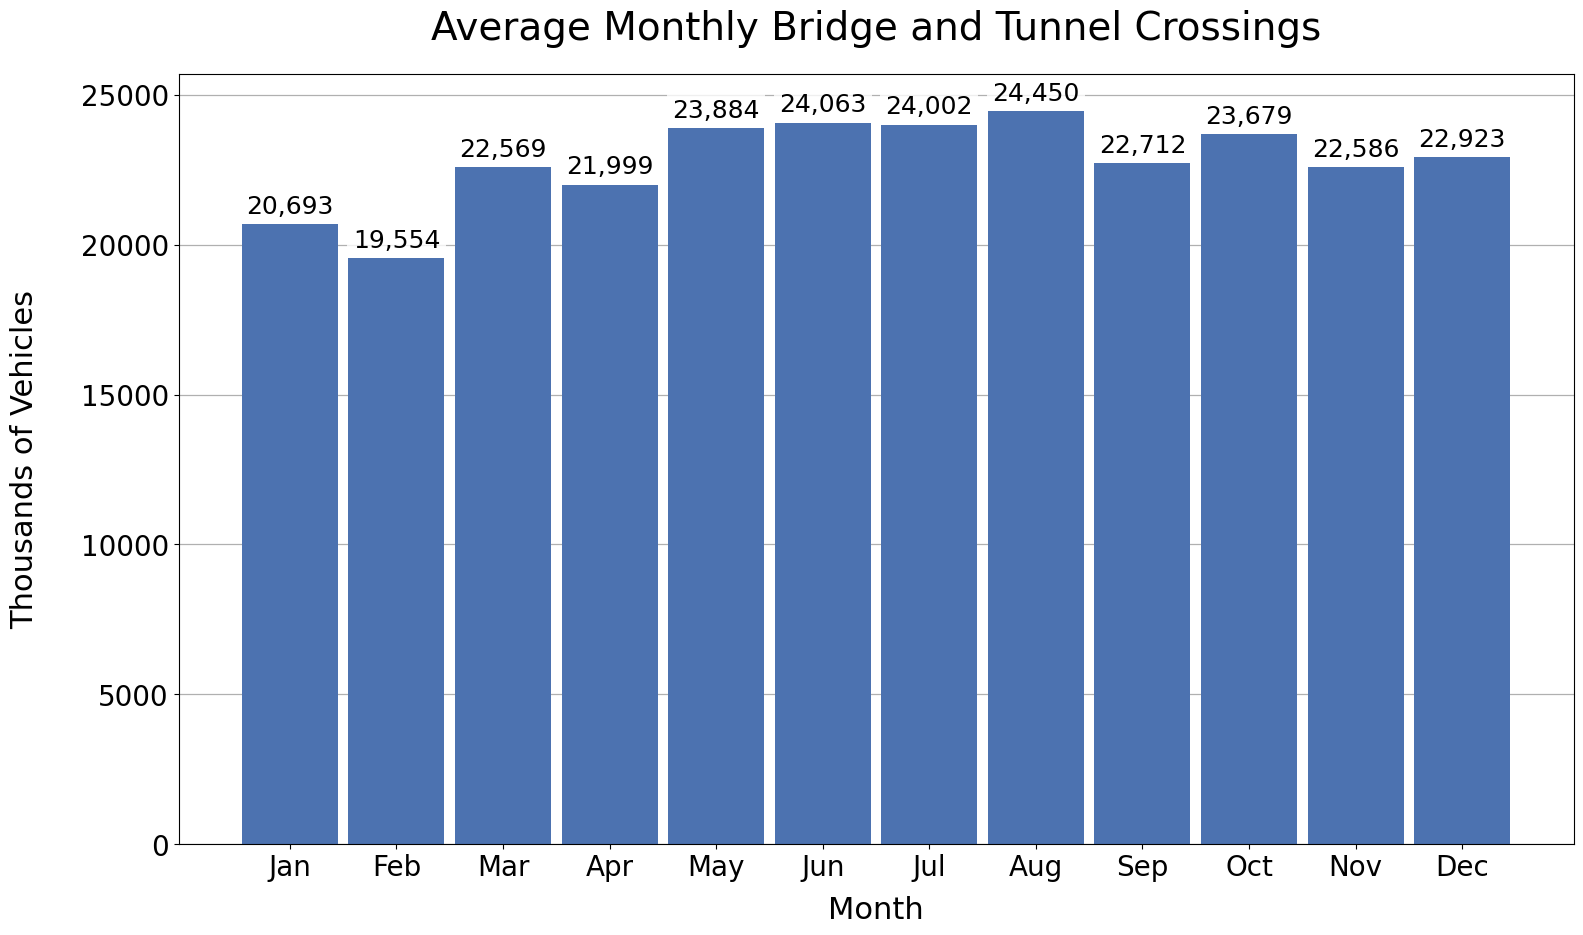

In [43]:
scale_factor = THOUSAND * total_years
monthly_crossings = pd.DataFrame(
    exclude_2017.groupby(by=exclude_2017["datetime"].dt.month)["Sum Vehicles"].sum()
    / scale_factor
)
monthly_crossings.index = monthly_crossings.index.map(MONTHS_MAP)
viz.grouped_bar_chart(
    monthly_crossings,
    title="Average Monthly Bridge and Tunnel Crossings",
    ylabel="Thousands of Vehicles",
    xlabel="Month",
    ylabel_rotation="vertical",
    bar_fontsize=18,
    bar_padding=4,
    bar_label_bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    save=os.path.join(IMG_DIR, "mta", "monthly_crossings.png"),
)

### Weekly Variation

- Crossings increase from Sunday to Friday.
- Cumulative traffic levels drop during the weekends, but not dramatically suggesting that the data does not over-index on rush-hour commuters.  

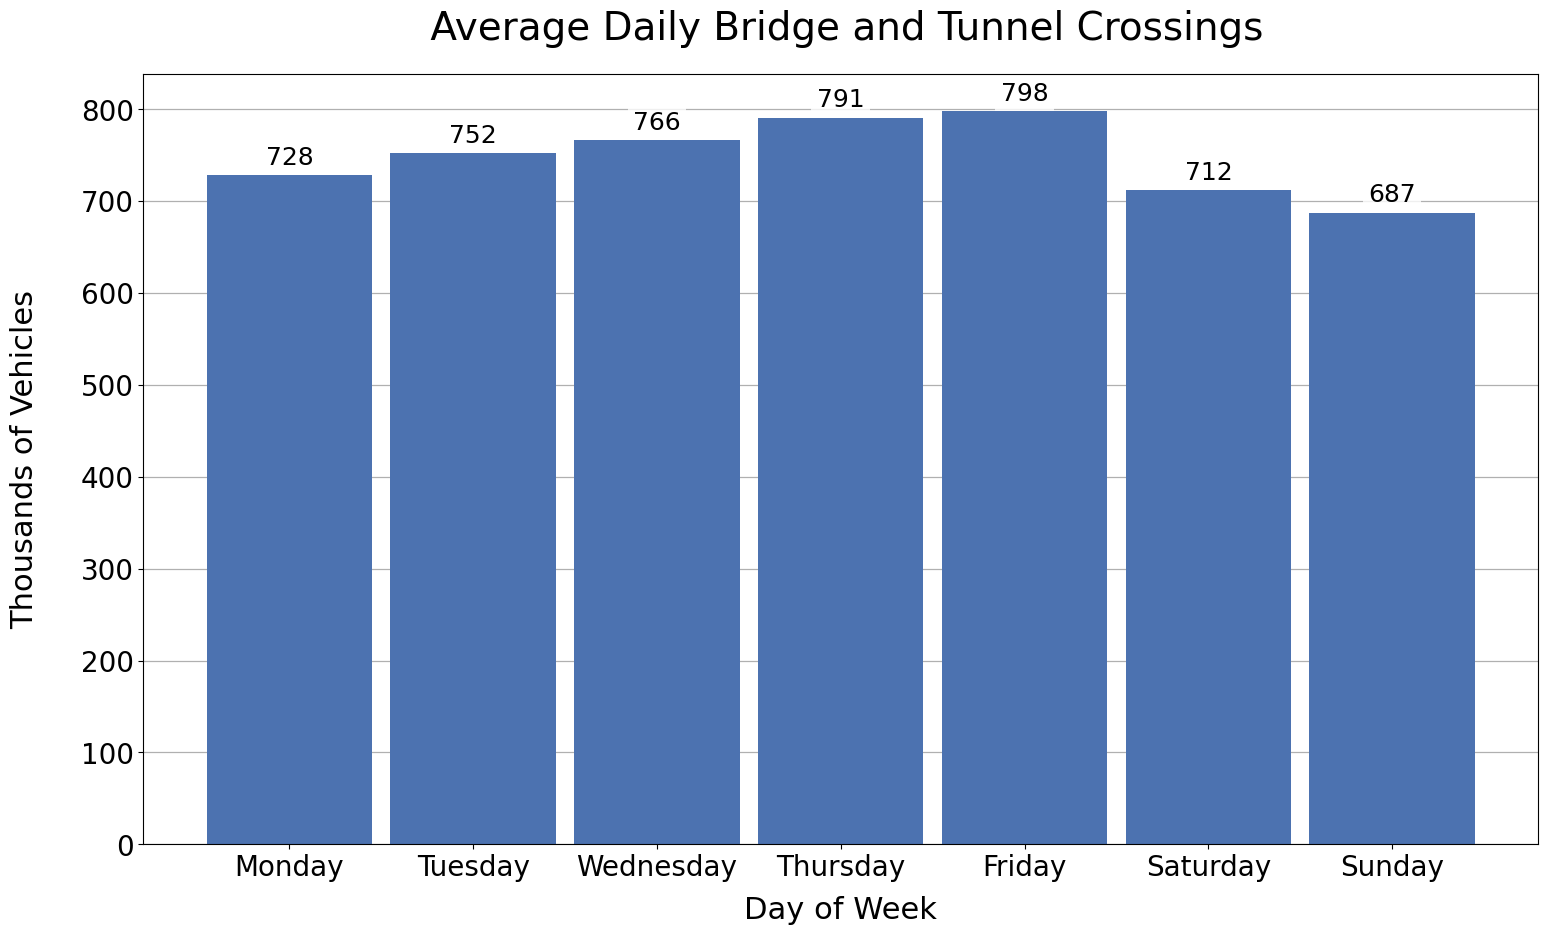

In [44]:
scale_factor = THOUSAND * total_weeks
daily_crossings = pd.DataFrame(
    exclude_2017.groupby(by=exclude_2017["datetime"].dt.dayofweek)["Sum Vehicles"].sum()
    / scale_factor
)
daily_crossings.index = daily_crossings.index.map(DAY_OF_WEEK_MAP)
day_labels = {
    "title": " Average Daily Bridge and Tunnel Crossings",
    "ylabel": "Thousands of Vehicles",
    "xlabel": "Day of Week",
}
viz.grouped_bar_chart(
    daily_crossings,
    **day_labels,
    ylabel_rotation="vertical",
    bar_fontsize=18,
    bar_padding=4,
    bar_label_bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    save=os.path.join(IMG_DIR, "mta", "weekly_crossings.png"),
)

### Daily Variation

- Crossings are elevated from 2pm to 7pm (hours 14 to 19)
- Traffic levels reflect typical daily traffic patterns with an evening peak and early morning lull suggesting that the dataset does not over-index on high traffic locations that are excessively busy throughout the day. 

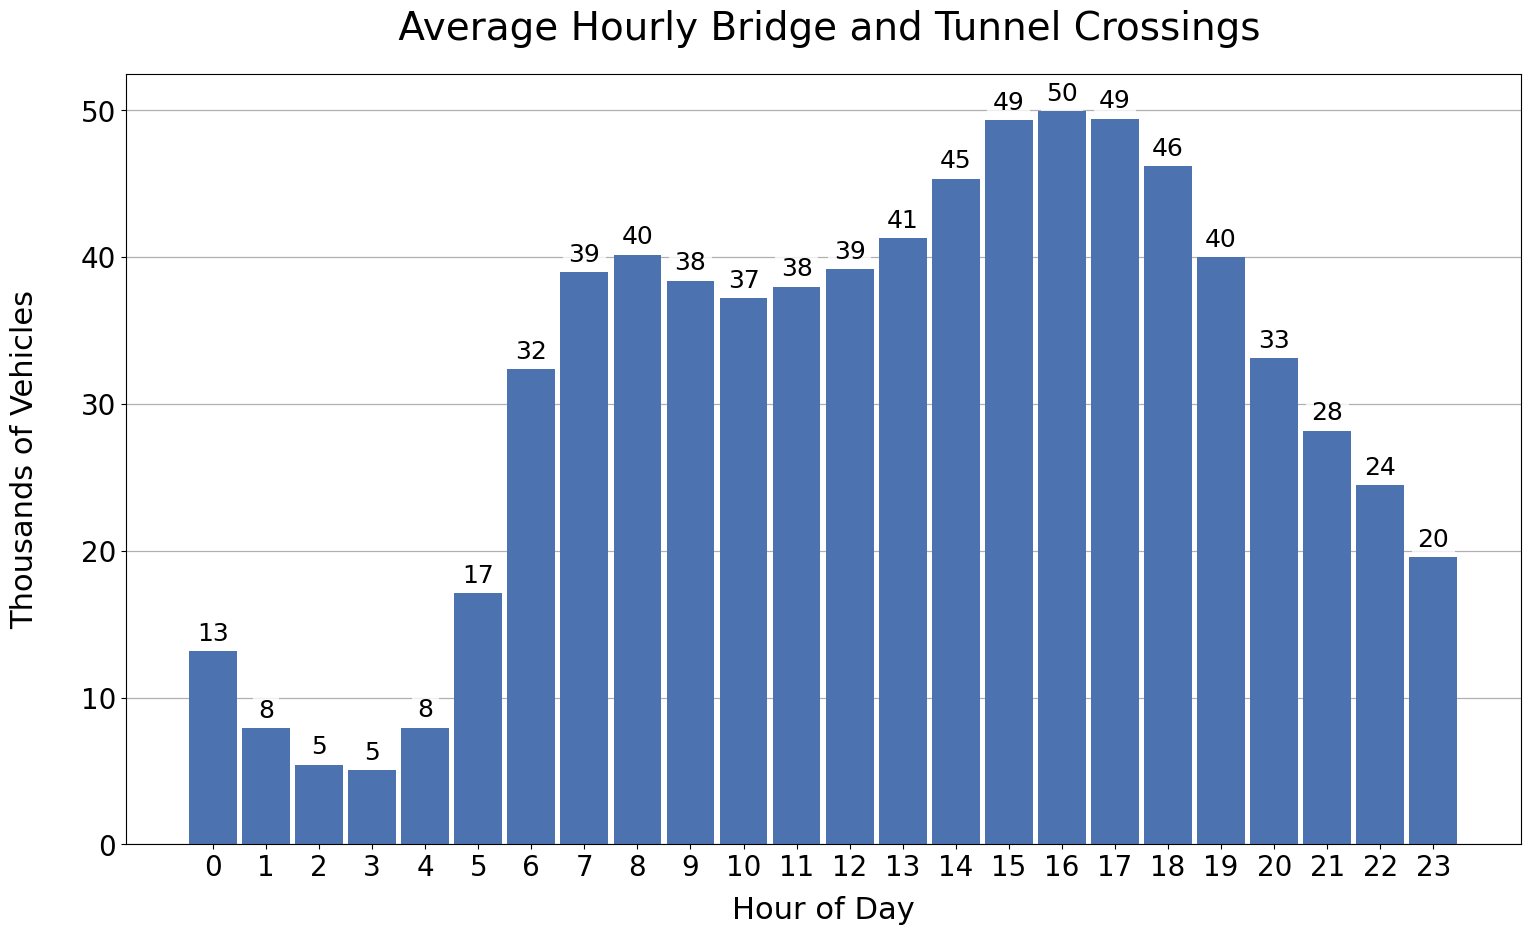

In [45]:
scale_factor = THOUSAND * total_days
hourly_crossings = pd.DataFrame(
    exclude_2017.groupby(by=exclude_2017["datetime"].dt.hour)["Sum Vehicles"].sum()
    / scale_factor
)
hour_labels = {
    "title": " Average Hourly Bridge and Tunnel Crossings",
    "ylabel": "Thousands of Vehicles",
    "xlabel": "Hour of Day",
}
viz.grouped_bar_chart(
    hourly_crossings,
    **hour_labels,
    ylabel_rotation="vertical",
    bar_fontsize=18,
    bar_padding=4,
    bar_label_bbox={"facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    save=os.path.join(IMG_DIR, "mta", "hourly_crossings.png"),
)

### 2D Weekly Variation

- Elevated crossings correspond to weekday rush hour periods
- Crossings are also elevated on weekend afternoons and earl evenings

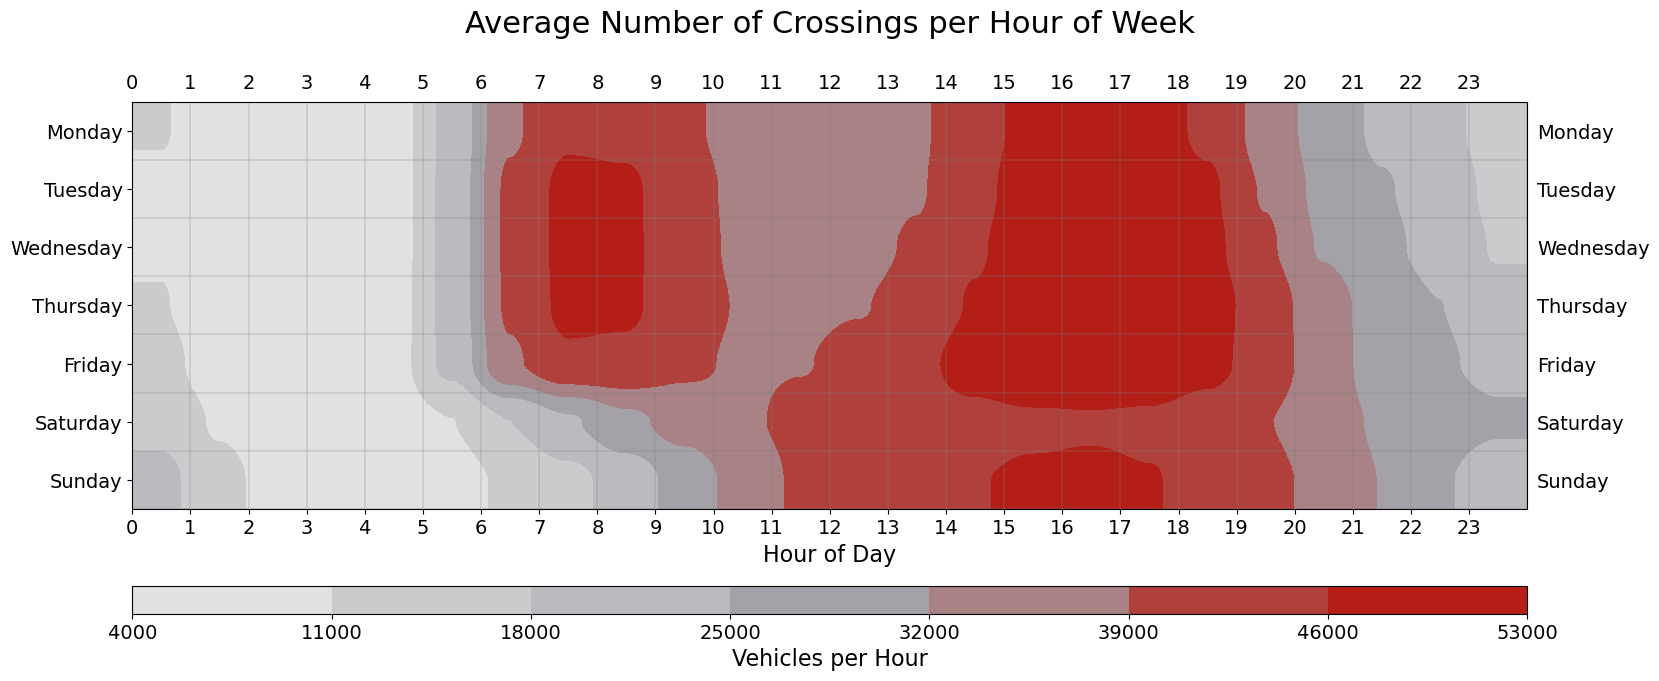

In [46]:
crossing_ct = pd.crosstab(
    index=exclude_2017["datetime"].dt.dayofweek,
    columns=exclude_2017["datetime"].dt.hour,
    values=exclude_2017["Sum Vehicles"],
    aggfunc="sum",
)
crossing_ct.rename(index=DAY_OF_WEEK_MAP, inplace=True)
crossing_ct /= total_weeks  # to get weekly average

ct_labels = src.utils.make_heatmap_labels(
    "Average Number of Crossings per Hour of Week", cbar_label="Vehicles per Hour"
)
viz.heat_map(
    crossing_ct,
    ct_labels,
    interpolation="hanning",
    cbar_format=lambda x: f"{round(x, -3):.0f}",
    save=os.path.join(IMG_DIR, "mta", "crossings_heatmap.png"),
)

In [47]:
counts_loc = (
    data.groupby(by=["datetime", "Location"])["Sum Vehicles"]
    .sum()
    .reset_index("Location")
)

In [48]:
location = "Bronx-Whitestone Bridge (BWB)"
crossing = counts_loc[counts_loc["Location"] == location]
ph.SeriesProfile(crossing[crossing.index.hour == 0]["Sum Vehicles"])

Sum Vehicles Info
-------------------  -----
Data Type            int64
Count                5163
Unique Values        2356
Null Values          0

  Value    Count  % of total
-------  -------  ------------
   1907       11  0.21%
   1652       10  0.19%
   2414        9  0.17%
   1852        9  0.17%
   1974        9  0.17%
   1825        9  0.17%
   2215        8  0.15%
   1658        8  0.15%
   1886        8  0.15%
   2441        8  0.15%
   1650        1  0.02%
   1822        1  0.02%
   5319        1  0.02%
   3515        1  0.02%
   3596        1  0.02%

Statistic                        Value
-------------------------  -----------
count                      5163
min                           0
1%                          752.86
5%                         1307.1
25%                        1710
50%                        2130
75%                        2687
95%                        3786.9
99%                        4647.52
max                        6573
mean                       2275.57
standard deviation          789.365
median                     2130
median absolute deviation   469
skew                          0.945832

In [49]:
ph.SeriesProfile(crossing["Sum Vehicles"])

Sum Vehicles Info
-------------------  ------
Data Type            int64
Count                123889
Unique Values        9126
Null Values          0

  Value    Count  % of total
-------  -------  ------------
      0       49  0.04%
   6989       35  0.03%
   6871       35  0.03%
   6627       34  0.03%
   6968       34  0.03%
   5814       34  0.03%
   7217       34  0.03%
   7069       33  0.03%
   5943       33  0.03%
   7026       33  0.03%
   9424        1  0.00%
    418        1  0.00%
   9483        1  0.00%
    363        1  0.00%
   9093        1  0.00%

Statistic                          Value
-------------------------  -------------
count                      123889
min                             0
1%                            691
5%                            990
25%                          2963
50%                          5483
75%                          6989
95%                          8375
99%                          8956
max                         18624
mean                         5031.35
standard deviation           2401.8
median                       5483
median absolute deviation    1819
skew                           -0.298808

# Conclusion

**The MTA Bridge and Tunnel Toll data appears to be a useful proxy for overall NYC traffic levels.**
- 2017 data has notable gaps that will need to be imputed
- It is a large hourly sample from connectors between all five boroughs
- The toll locations are spread throughout the city and do not over-index on a central business district
- The weekly and daily periodicity is inline with typical traffic patterns, reinforcing the idea that the data is a useful proxy for citywide traffic levels